Machine Learning Concepts
--
https://gist.github.com/byelipk/f4f3438ef994ec282f6e9d6581981418#:~:text=What%20is%20the%20most%20common,model%27s%20parameters%2C%20often%20called%20theta%20

1. How would you define Machine Learning?


2. Can you name four types of problems where it shines?

3. What is a labeled training set?

4. What are the two most common supervised tasks?

// Supervised learning
a. Classification - e.g image recognition, spam mails, handwriting.
b. Regression - e.g stock market price prediction, covid hotspot prediction, weather prediction, betting prediction etc

5. Can you name four common unsupervised tasks?


6. What type of Machine Learning algorithm would you use to allow a robot to walk in various unknown terrains?


7. What type of algorithm would you use to segment your customers into multiple groups?


8. Would you frame the problem of spam detection as a supervised learning problem or an unsupervised learning problem?


9. What is an online learning system?

Training data is split into smaller batches and used for training the model.

10. What do model-based learning algorithms search for? What is the most common strategy they use to succeed? How do they make predictions?

Model-based learning algorithms search for optimal values for model's parameters (theta).


11. Can you name four of the main challenges in Machine Learning?

a. Insufficient data
b. Poor quality data
c. Non-representation in data (for supervised learning)
d. Irrelevant features
e. 

12. If your model performs great on the training data but generalizes poorly to new instances, what is happening? Can you name three possible solutions?

13. What is a test set and why would you want to use it?


14. What is the purpose of a validation set?

15. What is cross-validation and why would you prefer it to a validation set?

Linear Regression
--
This exercise is borrowed from the book Hands-On Machine Learning with Scikit-Learn, Keras & TensorFlow (by A Géron): Chapter 1 – The Machine Learning landscape.

In this exercise we will explore if money makes people happy. We will be using Better Life Index data and stats about gross domestic product (GDP) per capita from IMF's website.

Setup your exercise
--
This function merges the OECD's life satisfaction data and the IMF's GDP per capita data.

In [2]:
def prepare_country_stats(oecd_bli, gdp_per_capita):
    oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
    oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
    
    gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
    gdp_per_capita.set_index("Country", inplace=True)
    
    full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita,
                                  left_index=True, right_index=True)
    full_country_stats.sort_values(by="GDP per capita", inplace=True)
    
    remove_indices = [0, 1, 6, 8, 33, 34, 35]
    keep_indices = list(set(range(36)) - set(remove_indices))
    return full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]

The code in the book expects the data files to be located in the current directory. I just tweaked it here to fetch the files in datasets/lifesat.

In [3]:
import os
datapath = os.path.join("datasets", "lifesat", "")

In [4]:
# To plot pretty figures directly within Jupyter
%matplotlib inline
import matplotlib as mpl
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

For simplicity we will just use data from the book's repo as suggested. The data is from 2015. You can also replace this by downloading new data, uploading that to your Jupiter notebook and loading it from your file. You will need to update years in 
prepare_country_stats
 function 
gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
 as well.

In [10]:
# Download the data
import urllib.request
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
os.makedirs(datapath, exist_ok=True)
for filename in ("oecd_bli_2015.csv", "gdp_per_capita.csv"):
    print("Downloading", filename)
    url = DOWNLOAD_ROOT + "datasets/lifesat/" + filename
    urllib.request.urlretrieve(url, datapath + filename)

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model
 
# Load the data
oecd_bli = pd.read_csv(datapath + "oecd_bli_2015.csv", thousands=',')
gdp_per_capita = pd.read_csv(datapath + "gdp_per_capita.csv",thousands=',',delimiter='\t',
                             encoding='latin1', na_values="n/a")
 
# Prepare the data
country_stats = prepare_country_stats(oecd_bli, gdp_per_capita)
X = np.c_[country_stats["GDP per capita"]]
y = np.c_[country_stats["Life satisfaction"]]

In [40]:
gdp_per_capita.columns

Index(['Subject Descriptor', 'Units', 'Scale', 'Country/Series-specific Notes',
       'GDP per capita', 'Estimates Start After'],
      dtype='object')

In [12]:
gdp_per_capita.head()

,Subject Descriptor,Units,Scale,Country/Series-specific Notes,GDP per capita,Estimates Start After
Country,,,,,,
Afghanistan,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",599.994,2013.0
Albania,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",3995.383,2010.0
Algeria,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4318.135,2014.0
Angola,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4100.315,2014.0
Antigua and Barbuda,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",14414.302,2011.0


In [41]:
oecd_bli.columns

Index(['LOCATION', 'Country', 'INDICATOR', 'Indicator', 'MEASURE', 'Measure',
       'INEQUALITY', 'Inequality', 'Unit Code', 'Unit', 'PowerCode Code',
       'PowerCode', 'Reference Period Code', 'Reference Period', 'Value',
       'Flag Codes', 'Flags'],
      dtype='object')

In [42]:
oecd_bli.head()

,LOCATION,Country,INDICATOR,Indicator,MEASURE,Measure,INEQUALITY,Inequality,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,AUS,Australia,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,1.1,E,Estimated value
1,AUT,Austria,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,1.0,NaN,NaN
2,BEL,Belgium,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,2.0,NaN,NaN
3,CAN,Canada,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,0.2,NaN,NaN
4,CZE,Czech Republic,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,0.9,NaN,NaN


We can generate a graph. It might already suggets some insights.

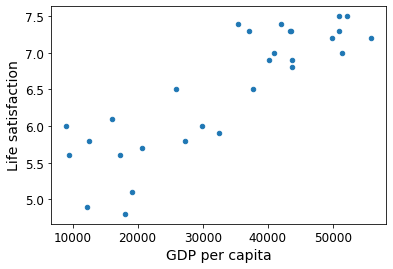

In [7]:
# Visualize the data
country_stats.plot(kind='scatter', x="GDP per capita", y='Life satisfaction')
plt.show()

We will use a Linear Regression to train a model. After training the model, let's predict Life Satisfaction for Ghana. According to IMF, in 2015, Ghana's GDP per capita was 1,784 USD (in 2020 it is 2,226 USD).

In [32]:
## Select a linear model
model = sklearn.linear_model.LinearRegression()
 
# Train the model
model.fit(X, y)
 
# Make a prediction for Ghana
X_new = [[2226]]  # Ghana' GDP per capita
print(model.predict(X_new))

[[4.96238378]]


k-Nearest Regression
--
Previously we a used model-based algorithm - Linear Regression. Now let's try using a instance-based algorithm - k-Nearest Neighbours with 3 neighbours instead.

In [37]:
import sklearn.neighbors
model = sklearn.neighbors.KNeighborsRegressor(n_neighbors=3)

# Train the model
model.fit(X, y)
 
# Make a prediction for Ghana
X_new = [[2226]]  # Ghana' GDP per capita
print(model.predict(X_new))


[[5.5]]


### Polynomial Regression
Predicting life satisfaction based only on GDP per capita does not sound like something that could result in accurate predictions.